# Predicting Employee Productivity Using Tree Models

## Introduction 

For this project we will be using the dataset Productivity Prediction of Garment Employees. The original dataset is in the [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/597/productivity+prediction+of+garment+employees). A description of the dataset, according to its official summary is as follows:

"The garment industry is one of the key examples of the industrial globalization of the modern era.
It is a highly labour-intensive industry with lots of manual processes. Satisfying the huge global demand for garment products is mostly dependent on the production and delivery performance of the employees in the garment manufacturing companies.
So, it is highly desirable among the decision-makers in the garments industry to track, analyze, and predict the productivity performance of the working teams in their factories."

This dataset can be used for regression purposes by predicting the productivity range (0-1) or for classification purposes by transforming the productivity range (0-1) into different classes.

In this project we will be focusing on a classification tree. We will start by analysing and cleaning the data before building a tree.

### The following is the dataset's official column information:

date: date in MM-DD-YYYY

quarter: a portion of the month — month was divided into four quarters

department: associated department with the instance

day: day of the week

team: associated team number with the instance

targeted_productivity: targeted productivity set by the authority for each team for each day

smv: standard minute value — the allocated time for a task

wip: work in progress — includes the number of unfinished items for products

over_time: represents the amount of overtime by each team in minutes

incentive: represents the amount of financial incentive (in BDT) that enables or motivates a particular course of action

idle_time: the duration of time when the production was interrupted due to several reasons

idle_men: the number of workers who were idle due to production interruption

no_of_style_change: number of changes in the style of a particular product

no_of_workers: number of workers on each team

actual_productivity: the actual % of productivity that was delivered by the workers — it ranges from 0 to 1.

In [1]:
import pandas as pd
df = pd.read_csv("garments_worker_productivity.csv")
df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [2]:
#Explore the shape of the dataset
df.shape

(1197, 15)

In [3]:
#explore the columns of the dataset, data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [4]:
df.describe()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,3.463963,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,3.000000,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,9.000000,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


### Observations


- Actual productivity column surpasses the limit of 1 
- Work in Progress WiP = 23122 (number of unfinished items for products)
- Time management very efficient sane there is hardly any idle_time and idle_men

We can evaluate the columns on by one:

In [5]:
# Date column

df["date"].head()



0    1/1/2015
1    1/1/2015
2    1/1/2015
3    1/1/2015
4    1/1/2015
Name: date, dtype: object

In [6]:
df["date"].tail()

1192    3/11/2015
1193    3/11/2015
1194    3/11/2015
1195    3/11/2015
1196    3/11/2015
Name: date, dtype: object

In [7]:
#We can also use a random sample to get a general idea of the data in the column
df["date"].sample(20)

845     2/19/2015
398     1/24/2015
17       1/1/2015
653      2/7/2015
1190    3/11/2015
156     1/10/2015
1043     3/3/2015
1087     3/7/2015
815     2/17/2015
802     2/16/2015
400     1/24/2015
1077     3/5/2015
269     1/15/2015
989      3/1/2015
521     1/31/2015
1170    3/10/2015
396     1/24/2015
409     1/24/2015
925     2/25/2015
154     1/10/2015
Name: date, dtype: object

In [8]:
#Quater column

df["quarter"].value_counts()


Quarter1    360
Quarter2    335
Quarter4    248
Quarter3    210
Quarter5     44
Name: quarter, dtype: int64

In [9]:
#Quarter 5 only has 44 values, which is the least of all the quarters. We can use a mask to explore the data in the quarter column


df[df["quarter"] == "Quarter5"]

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
498,1/29/2015,Quarter5,sweing,Thursday,2,0.80,22.52,1416.0,6840,113,0.0,0,0,57.0,1.000230
499,1/29/2015,Quarter5,finishing,Thursday,4,0.80,4.30,NaN,1200,0,0.0,0,0,10.0,0.989000
500,1/29/2015,Quarter5,sweing,Thursday,3,0.80,22.52,1287.0,6840,100,0.0,0,0,57.0,0.950186
501,1/29/2015,Quarter5,sweing,Thursday,4,0.80,22.52,1444.0,6900,88,0.0,0,0,57.5,0.900800
502,1/29/2015,Quarter5,sweing,Thursday,10,0.80,22.52,1088.0,6720,88,0.0,0,0,56.0,0.900130
503,1/29/2015,Quarter5,finishing,Thursday,6,0.50,2.90,NaN,1200,0,0.0,0,0,10.0,0.899000
504,1/29/2015,Quarter5,finishing,Thursday,8,0.65,4.15,NaN,960,0,0.0,0,0,8.0,0.877552
505,1/29/2015,Quarter5,finishing,Thursday,11,0.60,2.90,NaN,960,0,0.0,0,0,8.0,0.864583
506,1/29/2015,Quarter5,finishing,Thursday,10,0.80,3.94,NaN,1200,0,0.0,0,0,10.0,0.856950
507,1/29/2015,Quarter5,finishing,Thursday,1,0.75,3.94,NaN,1200,0,0.0,0,0,10.0,0.853667


The 44 values occur on the 29th and 31st of Jan 2015. Quarter 5 can be merged into Quarter 4, as we may not need a seperate column for this

In [10]:
#'Department' column

df["department"].value_counts()

sweing        691
finishing     257
finishing     249
Name: department, dtype: int64

In [11]:
df["department"].unique()

array(['sweing', 'finishing ', 'finishing'], dtype=object)

Error here as there is a space after 'finishing ' making it a double count

In [12]:
#combine finishing columns by removing the space between the words
df["department"] = df["department"].str.replace("finishing ", "finishing")

df["department"].value_counts()

sweing       691
finishing    506
Name: department, dtype: int64

In [13]:
#Day column

df["day"].value_counts()

# No Fridays in the dataset suggest the day may be a non work day.


Wednesday    208
Sunday       203
Tuesday      201
Thursday     199
Monday       199
Saturday     187
Name: day, dtype: int64

In [14]:
#Team column

df["team"].value_counts().sort_index() #sort the values by index i.e team number

1     105
2     109
3      95
4     105
5      93
6      94
7      96
8     109
9     104
10    100
11     88
12     99
Name: team, dtype: int64

In [15]:
# Targeted_productivity & Actual_productivity columns
#we can check the two columns together to see if there are any discrepancies between the two columns

df[["targeted_productivity", "actual_productivity"]].head()

,targeted_productivity,actual_productivity
0,0.80,0.940725
1,0.75,0.886500
2,0.80,0.800570
3,0.80,0.800570
4,0.80,0.800382


In [16]:
#find the number of rows where the actual productivity is greater than the targeted productivity
df[df["actual_productivity"] > df["targeted_productivity"]]

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1187,3/11/2015,Quarter2,sweing,Wednesday,4,0.75,26.82,1054.0,7080,45,0.0,0,0,59.0,0.750051
1188,3/11/2015,Quarter2,sweing,Wednesday,5,0.70,26.82,992.0,6960,30,0.0,0,1,58.0,0.700557
1189,3/11/2015,Quarter2,sweing,Wednesday,8,0.70,30.48,914.0,6840,30,0.0,0,1,57.0,0.700505
1190,3/11/2015,Quarter2,sweing,Wednesday,6,0.70,23.41,1128.0,4560,40,0.0,0,1,38.0,0.700246


In [17]:
869/1197 

# 72% of the rows have actual productivity greater than the targeted productivity

0.7259816207184628

In [18]:
df[df["targeted_productivity"] == df["actual_productivity"]] #find the number of rows where the actual productivity is equal to the targeted productivity

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
163,1/10/2015,Quarter2,sweing,Saturday,10,0.8,28.08,1082.0,10530,63,0.0,0,0,58.5,0.8
182,1/11/2015,Quarter2,sweing,Sunday,2,0.8,28.08,805.0,10530,63,0.0,0,0,58.5,0.8
183,1/11/2015,Quarter2,sweing,Sunday,10,0.8,28.08,762.0,10530,38,0.0,0,0,58.5,0.8
207,1/12/2015,Quarter2,sweing,Monday,2,0.8,28.08,737.0,10530,63,0.0,0,0,58.5,0.8
229,1/13/2015,Quarter2,sweing,Tuesday,2,0.8,28.08,723.0,10530,50,0.0,0,0,58.5,0.8
855,2/19/2015,Quarter3,sweing,Thursday,8,0.7,29.40,1116.0,6240,0,0.0,0,2,57.0,0.7


Only 6 observations!

In [19]:
df[df["targeted_productivity"] > df["actual_productivity"]] #find the number of rows where the actual productivity is less than the targeted productivity

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
11,1/1/2015,Quarter1,sweing,Thursday,10,0.75,19.31,578.0,6480,45,0.0,0,0,54.0,0.712205
12,1/1/2015,Quarter1,sweing,Thursday,5,0.80,11.41,668.0,3660,50,0.0,0,0,30.5,0.707046
14,1/1/2015,Quarter1,finishing,Thursday,8,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.676667
15,1/1/2015,Quarter1,finishing,Thursday,4,0.75,3.94,NaN,2160,0,0.0,0,0,18.0,0.593056
16,1/1/2015,Quarter1,finishing,Thursday,7,0.80,2.90,NaN,960,0,0.0,0,0,8.0,0.540729
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.628333
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.90,NaN,1800,0,0.0,0,0,15.0,0.505889


In [20]:
322/1197 
# 27% of the rows have actual productivity less than the targeted productivity

0.26900584795321636

In [21]:
df[df["actual_productivity"] > 1] #find the number of rows where the actual productivity is greater than 1 despite the targeted productivity being 1

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
337,1/20/2015,Quarter3,finishing,Tuesday,5,0.70,4.15,NaN,1440,0,0.0,0,0,8.0,1.033570
437,1/26/2015,Quarter4,finishing,Monday,3,0.75,3.94,NaN,1800,0,0.0,0,0,10.0,1.059621
456,1/27/2015,Quarter4,sweing,Tuesday,2,0.75,22.52,1635.0,6840,119,0.0,0,0,57.0,1.000230
457,1/27/2015,Quarter4,sweing,Tuesday,3,0.75,22.52,1299.0,6840,119,0.0,0,0,57.0,1.000230
477,1/28/2015,Quarter4,sweing,Wednesday,2,0.80,22.52,1559.0,6840,90,0.0,0,0,57.0,1.000230
478,1/28/2015,Quarter4,sweing,Wednesday,3,0.80,22.52,1350.0,6840,113,0.0,0,0,57.0,1.000230
498,1/29/2015,Quarter5,sweing,Thursday,2,0.80,22.52,1416.0,6840,113,0.0,0,0,57.0,1.000230
518,1/31/2015,Quarter5,sweing,Saturday,3,0.80,22.52,1136.0,6960,113,0.0,0,0,58.0,1.000457
519,1/31/2015,Quarter5,sweing,Saturday,2,0.80,22.52,1397.0,6840,113,0.0,0,0,57.0,1.000230
542,2/1/2015,Quarter1,finishing,Sunday,8,0.65,4.15,NaN,960,0,0.0,0,0,8.0,1.011562


In [22]:
#WIP column

df["wip"].value_counts()

1039.0    5
1282.0    4
1263.0    3
1216.0    3
1069.0    3
         ..
1635.0    1
1519.0    1
1337.0    1
1118.0    1
914.0     1
Name: wip, Length: 548, dtype: int64

In [23]:
df[df["wip"].isnull()] #find the number of rows where the wip column is null

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
6,1/1/2015,Quarter1,finishing,Thursday,2,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.755167
13,1/1/2015,Quarter1,finishing,Thursday,10,0.65,3.94,NaN,960,0,0.0,0,0,8.0,0.705917
14,1/1/2015,Quarter1,finishing,Thursday,8,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.676667
15,1/1/2015,Quarter1,finishing,Thursday,4,0.75,3.94,NaN,2160,0,0.0,0,0,18.0,0.593056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.628333
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.90,NaN,1800,0,0.0,0,0,15.0,0.505889


In [24]:
506/1197
# 42% of the rows have the wip column as null 

0.4227234753550543

In [25]:
#over_time column
df["over_time"].describe()

count     1197.000000
mean      4567.460317
std       3348.823563
min          0.000000
25%       1440.000000
50%       3960.000000
75%       6960.000000
max      25920.000000
Name: over_time, dtype: float64

In [26]:
#lets see how many observations are above the 50th percentile 
df[df["over_time"] > 3960]

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
5,1/1/2015,Quarter1,sweing,Thursday,7,0.80,25.90,984.0,6720,38,0.0,0,0,56.0,0.800125
7,1/1/2015,Quarter1,sweing,Thursday,3,0.75,28.08,795.0,6900,45,0.0,0,0,57.5,0.753683
8,1/1/2015,Quarter1,sweing,Thursday,2,0.75,19.87,733.0,6000,34,0.0,0,0,55.0,0.753098
9,1/1/2015,Quarter1,sweing,Thursday,1,0.75,28.08,681.0,6900,45,0.0,0,0,57.5,0.750428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1187,3/11/2015,Quarter2,sweing,Wednesday,4,0.75,26.82,1054.0,7080,45,0.0,0,0,59.0,0.750051
1188,3/11/2015,Quarter2,sweing,Wednesday,5,0.70,26.82,992.0,6960,30,0.0,0,1,58.0,0.700557
1189,3/11/2015,Quarter2,sweing,Wednesday,8,0.70,30.48,914.0,6840,30,0.0,0,1,57.0,0.700505
1190,3/11/2015,Quarter2,sweing,Wednesday,6,0.70,23.41,1128.0,4560,40,0.0,0,1,38.0,0.700246


In [27]:
597/1197
# 50% of the observations are above the 50th percentile suggesting a significant overtime among teams

0.49874686716791977

In [28]:
#Columns without overtime
df[df["over_time"] == 0]

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
684,2/9/2015,Quarter2,sweing,Monday,11,0.75,10.05,103.0,0,45,0.0,0,0,54.0,0.750648
694,2/10/2015,Quarter2,sweing,Tuesday,10,0.80,22.52,1268.0,0,88,0.0,0,0,56.0,0.900632
695,2/10/2015,Quarter2,sweing,Tuesday,1,0.80,22.52,1546.0,0,88,0.0,0,0,57.0,0.900471
696,2/10/2015,Quarter2,sweing,Tuesday,3,0.80,22.52,813.0,0,88,0.0,0,0,57.0,0.900471
697,2/10/2015,Quarter2,sweing,Tuesday,2,0.80,22.52,1512.0,0,88,0.0,0,0,57.0,0.899984
713,2/11/2015,Quarter2,sweing,Wednesday,2,0.80,22.52,1557.0,0,90,0.0,0,0,57.5,1.000345
714,2/11/2015,Quarter2,sweing,Wednesday,1,0.80,22.52,1498.0,0,113,0.0,0,0,57.0,1.000066
718,2/11/2015,Quarter2,sweing,Wednesday,10,0.80,22.52,598.0,0,75,0.0,0,0,56.0,0.850365
730,2/12/2015,Quarter2,sweing,Thursday,1,0.80,22.52,1397.0,0,138,0.0,0,0,57.0,1.100484
732,2/12/2015,Quarter2,sweing,Thursday,2,0.80,22.52,1327.0,0,113,0.0,0,0,57.5,1.000345


In [29]:
len(df[df["over_time"] == 0]) #find the number of rows where the over_time column is 0

31

In [30]:
#contrat 'over_time' with 'actual_productivity' and 'targeted_productivity'
df[(df["over_time"] == 0) & (df["actual_productivity"] > df["targeted_productivity"])]

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
684,2/9/2015,Quarter2,sweing,Monday,11,0.75,10.05,103.0,0,45,0.0,0,0,54.0,0.750648
694,2/10/2015,Quarter2,sweing,Tuesday,10,0.80,22.52,1268.0,0,88,0.0,0,0,56.0,0.900632
695,2/10/2015,Quarter2,sweing,Tuesday,1,0.80,22.52,1546.0,0,88,0.0,0,0,57.0,0.900471
696,2/10/2015,Quarter2,sweing,Tuesday,3,0.80,22.52,813.0,0,88,0.0,0,0,57.0,0.900471
697,2/10/2015,Quarter2,sweing,Tuesday,2,0.80,22.52,1512.0,0,88,0.0,0,0,57.0,0.899984
713,2/11/2015,Quarter2,sweing,Wednesday,2,0.80,22.52,1557.0,0,90,0.0,0,0,57.5,1.000345
714,2/11/2015,Quarter2,sweing,Wednesday,1,0.80,22.52,1498.0,0,113,0.0,0,0,57.0,1.000066
718,2/11/2015,Quarter2,sweing,Wednesday,10,0.80,22.52,598.0,0,75,0.0,0,0,56.0,0.850365
730,2/12/2015,Quarter2,sweing,Thursday,1,0.80,22.52,1397.0,0,138,0.0,0,0,57.0,1.100484
732,2/12/2015,Quarter2,sweing,Thursday,2,0.80,22.52,1327.0,0,113,0.0,0,0,57.5,1.000345


Most targets are achieved by putting in over time hours! 

In [31]:
#incentive column
df["incentive"].describe()


count    1197.000000
mean       38.210526
std       160.182643
min         0.000000
25%         0.000000
50%         0.000000
75%        50.000000
max      3600.000000
Name: incentive, dtype: float64

In [32]:
len(df[df["incentive"] == 0])

#more than half of the observations have no incentive

604

In [33]:
#check for how many incentives are greater than the 75th percentile
df[df["incentive"] > 50]


,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
27,1/3/2015,Quarter1,sweing,Saturday,12,0.80,26.16,844.0,7080,63,0.0,0,0,59.0,0.800319
32,1/3/2015,Quarter1,sweing,Saturday,10,0.75,19.31,610.0,6480,56,0.0,0,0,54.0,0.787300
45,1/4/2015,Quarter1,sweing,Sunday,9,0.80,26.16,1278.0,7080,60,0.0,0,0,59.0,0.850569
46,1/4/2015,Quarter1,sweing,Sunday,7,0.80,25.90,1227.0,7020,60,0.0,0,0,56.5,0.850436
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1156,3/10/2015,Quarter2,sweing,Tuesday,4,0.75,26.82,1104.0,5880,65,0.0,0,0,59.0,0.850084
1158,3/10/2015,Quarter2,sweing,Tuesday,12,0.80,15.26,1069.0,4080,63,0.0,0,0,34.0,0.800402
1159,3/10/2015,Quarter2,sweing,Tuesday,3,0.80,30.10,756.0,6960,63,0.0,0,1,58.0,0.800072
1178,3/11/2015,Quarter2,sweing,Wednesday,12,0.80,15.26,470.0,4080,63,0.0,0,0,34.0,0.800402


In [34]:
231/1197
# 19% of the observations have incentives greater than the 75th percentile

0.19298245614035087

In [35]:
# 'idle_time' & 'idle_men' columns

df[df["idle_time"] > 0] #find the number of rows where the idle_time column is greater than 0 i.e the machines were idle for some time

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
615,2/4/2015,Quarter1,sweing,Wednesday,5,0.65,30.10,326.0,5820,0,90.0,10,0,58.5,0.650835
617,2/4/2015,Quarter1,sweing,Wednesday,4,0.35,30.10,287.0,6060,23,150.0,15,0,55.5,0.350706
650,2/7/2015,Quarter1,sweing,Saturday,7,0.70,24.26,658.0,6960,0,270.0,45,0,58.0,0.662270
654,2/7/2015,Quarter1,sweing,Saturday,8,0.70,24.26,652.0,6840,0,300.0,37,0,57.0,0.365319
775,2/15/2015,Quarter3,sweing,Sunday,8,0.70,30.10,507.0,5880,40,2.0,10,1,59.0,0.700573
798,2/16/2015,Quarter3,sweing,Monday,8,0.70,30.10,7.0,7080,27,2.0,10,2,59.0,0.621972
818,2/17/2015,Quarter3,sweing,Tuesday,8,0.60,29.40,179.0,0,23,5.0,30,2,58.0,0.600983
822,2/17/2015,Quarter3,sweing,Tuesday,10,0.65,18.22,741.0,0,0,8.0,35,1,49.0,0.302117
841,2/18/2015,Quarter3,sweing,Wednesday,10,0.70,19.68,1119.0,5640,0,8.0,35,1,47.0,0.303574
843,2/18/2015,Quarter3,sweing,Wednesday,8,0.65,29.40,962.0,4560,0,4.5,30,2,57.0,0.251399


In [36]:
len(df[(df["idle_time"] > 0)]) #find the number of rows where the idle_time column is greater than 0 i.e the machines were idle for some time


18

Only 18 observations - factory rarely has interruptions 

In [37]:
#no_of_style_change column
df["no_of_style_change"].describe()

count    1197.000000
mean        0.150376
std         0.427848
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         2.000000
Name: no_of_style_change, dtype: float64

In [38]:
df[df["no_of_style_change"] >= 1]

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
634,2/5/2015,Quarter1,sweing,Thursday,4,0.50,30.10,417.0,6360,23,0.0,0,1,53.0,0.500720
651,2/7/2015,Quarter1,sweing,Saturday,4,0.60,30.10,486.0,6780,30,0.0,0,1,57.0,0.600224
671,2/8/2015,Quarter2,sweing,Sunday,4,0.65,30.10,712.0,6780,44,0.0,0,1,56.5,0.568260
683,2/9/2015,Quarter2,sweing,Monday,4,0.70,30.10,767.0,3300,50,0.0,0,1,57.0,0.790003
689,2/9/2015,Quarter2,sweing,Monday,7,0.35,30.10,842.0,6960,0,0.0,0,1,58.0,0.350302
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1185,3/11/2015,Quarter2,sweing,Wednesday,2,0.75,16.10,971.0,5400,45,0.0,0,1,45.0,0.750141
1188,3/11/2015,Quarter2,sweing,Wednesday,5,0.70,26.82,992.0,6960,30,0.0,0,1,58.0,0.700557
1189,3/11/2015,Quarter2,sweing,Wednesday,8,0.70,30.48,914.0,6840,30,0.0,0,1,57.0,0.700505
1190,3/11/2015,Quarter2,sweing,Wednesday,6,0.70,23.41,1128.0,4560,40,0.0,0,1,38.0,0.700246


In [39]:
df[df["no_of_style_change"] == 1]

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
634,2/5/2015,Quarter1,sweing,Thursday,4,0.50,30.10,417.0,6360,23,0.0,0,1,53.0,0.500720
651,2/7/2015,Quarter1,sweing,Saturday,4,0.60,30.10,486.0,6780,30,0.0,0,1,57.0,0.600224
671,2/8/2015,Quarter2,sweing,Sunday,4,0.65,30.10,712.0,6780,44,0.0,0,1,56.5,0.568260
683,2/9/2015,Quarter2,sweing,Monday,4,0.70,30.10,767.0,3300,50,0.0,0,1,57.0,0.790003
689,2/9/2015,Quarter2,sweing,Monday,7,0.35,30.10,842.0,6960,0,0.0,0,1,58.0,0.350302
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1185,3/11/2015,Quarter2,sweing,Wednesday,2,0.75,16.10,971.0,5400,45,0.0,0,1,45.0,0.750141
1188,3/11/2015,Quarter2,sweing,Wednesday,5,0.70,26.82,992.0,6960,30,0.0,0,1,58.0,0.700557
1189,3/11/2015,Quarter2,sweing,Wednesday,8,0.70,30.48,914.0,6840,30,0.0,0,1,57.0,0.700505
1190,3/11/2015,Quarter2,sweing,Wednesday,6,0.70,23.41,1128.0,4560,40,0.0,0,1,38.0,0.700246


In [40]:
len (df[df["no_of_style_change"] == 1])


114

In [41]:
len (df[df["no_of_style_change"] == 2])

33

On the whole there is one change to style but the vast majority have no change in style

In [42]:
#No of workers column

df["no_of_workers"].describe()

count    1197.000000
mean       34.609858
std        22.197687
min         2.000000
25%         9.000000
50%        34.000000
75%        57.000000
max        89.000000
Name: no_of_workers, dtype: float64

In [43]:
df[df["no_of_workers"] > 57] #find the number of rows where the no_of_workers column is greater than 57 i.e the 75th percentile



,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
7,1/1/2015,Quarter1,sweing,Thursday,3,0.75,28.08,795.0,6900,45,0.0,0,0,57.5,0.753683
9,1/1/2015,Quarter1,sweing,Thursday,1,0.75,28.08,681.0,6900,45,0.0,0,0,57.5,0.750428
10,1/1/2015,Quarter1,sweing,Thursday,9,0.70,28.08,872.0,6900,44,0.0,0,0,57.5,0.721127
17,1/1/2015,Quarter1,sweing,Thursday,4,0.65,23.69,861.0,7200,0,0.0,0,0,60.0,0.521180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1179,3/11/2015,Quarter2,sweing,Wednesday,3,0.80,30.10,735.0,6960,63,0.0,0,1,58.0,0.800072
1180,3/11/2015,Quarter2,sweing,Wednesday,11,0.80,11.41,560.0,3420,50,0.0,0,0,58.0,0.800035
1186,3/11/2015,Quarter2,sweing,Wednesday,1,0.75,26.82,1322.0,7080,45,0.0,0,0,59.0,0.750051
1187,3/11/2015,Quarter2,sweing,Wednesday,4,0.75,26.82,1054.0,7080,45,0.0,0,0,59.0,0.750051


## Data Cleaning

We can clean the data by:
- Removing the space in the department column
- Changing Quarter column to numerical values
- Remove unecessary columns
- Ensure decimal points are consistent in the dataset

In [44]:
#Combine Quarter5 and Quarter4 into one quarter
df.loc[df["quarter"] == "Quarter5", "quarter"] = "Quarter4"
df["quarter"].value_counts()

Quarter1    360
Quarter2    335
Quarter4    292
Quarter3    210
Name: quarter, dtype: int64

In [45]:
#remove the "Quarter" from the quarter column
df.loc[df["quarter"] == "Quarter1", "quarter"] = 1
df.loc[df["quarter"] == "Quarter2", "quarter"] = 2
df.loc[df["quarter"] == "Quarter3", "quarter"] = 3
df.loc[df["quarter"] == "Quarter4", "quarter"] = 4
df["quarter"].value_counts()

1    360
2    335
4    292
3    210
Name: quarter, dtype: int64

In [46]:
df["quarter"] = df["quarter"].astype("int") #change the data type of the quarter column to integer
df[["quarter"]].info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   quarter  1197 non-null   int32
dtypes: int32(1)
memory usage: 4.8 KB


In [47]:
#remove idle_time and idle_men columns as there are too many missing values
df = df.drop(["idle_time", "idle_men"], axis = 1)
df.head(2)

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0,59.0,0.940725
1,1/1/2015,1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0,8.0,0.886500


In [48]:
#remove the WIP column as there are too many missing values and it is not relevant to the analysis; we dont know what an emtpy WIP means

df = df.drop(["wip"], axis = 1)
df.head(2)

,date,quarter,department,day,team,targeted_productivity,smv,over_time,incentive,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,1,sweing,Thursday,8,0.80,26.16,7080,98,0,59.0,0.940725
1,1/1/2015,1,finishing,Thursday,1,0.75,3.94,960,0,0,8.0,0.886500


In [49]:
#remove no_of_style_change column as it is not relevant to the analysis
df = df.drop("no_of_style_change", axis = 1)
df.head(2)


,date,quarter,department,day,team,targeted_productivity,smv,over_time,incentive,no_of_workers,actual_productivity
0,1/1/2015,1,sweing,Thursday,8,0.80,26.16,7080,98,59.0,0.940725
1,1/1/2015,1,finishing,Thursday,1,0.75,3.94,960,0,8.0,0.886500


In [50]:
#convert no of workers to integer
df["no_of_workers"] = df["no_of_workers"].astype("int")
df.head(2)

,date,quarter,department,day,team,targeted_productivity,smv,over_time,incentive,no_of_workers,actual_productivity
0,1/1/2015,1,sweing,Thursday,8,0.80,26.16,7080,98,59,0.940725
1,1/1/2015,1,finishing,Thursday,1,0.75,3.94,960,0,8,0.886500


In [51]:
#establish consistency in dp for productivity columns

df["actual_productivity"] = df["actual_productivity"].round(2)
df.head(2)

,date,quarter,department,day,team,targeted_productivity,smv,over_time,incentive,no_of_workers,actual_productivity
0,1/1/2015,1,sweing,Thursday,8,0.80,26.16,7080,98,59,0.94
1,1/1/2015,1,finishing,Thursday,1,0.75,3.94,960,0,8,0.89


- As we are building a Classification Tree and not a Regression Tree, our target column "actual_productivity" must be categorical, not numerical.
- To accomplish this, we will create a new column called "productive". It will feature boolean values indicating if the productivity targets were achieved for each observation in the dataset.

In [52]:
df["productive"] = df["actual_productivity"] >= df["targeted_productivity"]
df.sample(10)

,date,quarter,department,day,team,targeted_productivity,smv,over_time,incentive,no_of_workers,actual_productivity,productive
1046,3/3/2015,1,sweing,Tuesday,2,0.40,15.28,5400,0,45,0.30,False
219,1/13/2015,2,finishing,Tuesday,3,0.80,4.15,1620,0,9,0.90,True
355,1/21/2015,3,sweing,Wednesday,6,0.80,11.61,5760,75,89,0.85,True
605,2/4/2015,1,sweing,Wednesday,1,0.80,22.52,6900,88,57,0.90,True
396,1/24/2015,4,sweing,Saturday,2,0.75,22.94,10260,94,57,0.90,True
264,1/15/2015,3,sweing,Thursday,1,0.80,26.16,10620,75,59,0.85,True
513,1/29/2015,4,finishing,Thursday,12,0.75,4.08,1080,0,9,0.63,False
1039,3/3/2015,1,finishing,Tuesday,12,0.80,4.60,3780,0,9,0.64,False
683,2/9/2015,2,sweing,Monday,4,0.70,30.10,3300,50,57,0.79,True
660,2/8/2015,2,finishing,Sunday,1,0.80,3.94,1200,0,10,0.89,True


In [53]:
#check for columns
df.columns

Index(['date', 'quarter', 'department', 'day', 'team', 'targeted_productivity',
       'smv', 'over_time', 'incentive', 'no_of_workers', 'actual_productivity',
       'productive'],
      dtype='object')

In [54]:
#re-order columns for better readability
df = df[["quarter", "day", "department", "team", "no_of_workers", "targeted_productivity", 
        "actual_productivity", "productive", "over_time", "smv", "incentive"]]
df.head()

,quarter,day,department,team,no_of_workers,targeted_productivity,actual_productivity,productive,over_time,smv,incentive
0,1,Thursday,sweing,8,59,0.80,0.94,True,7080,26.16,98
1,1,Thursday,finishing,1,8,0.75,0.89,True,960,3.94,0
2,1,Thursday,sweing,11,30,0.80,0.80,True,3660,11.41,50
3,1,Thursday,sweing,12,30,0.80,0.80,True,3660,11.41,50
4,1,Thursday,sweing,6,56,0.80,0.80,True,1920,25.90,50


In [55]:
#Apply categorical encoding to the department column
df["department"].replace({"finishing": 0, "sweing": 1}, inplace = True)
df.rename(columns = {"department": "dept_sweing"}, inplace = True) # Also changing column's name here
df.head(10)

,quarter,day,dept_sweing,team,no_of_workers,targeted_productivity,actual_productivity,productive,over_time,smv,incentive
0,1,Thursday,1,8,59,0.80,0.94,True,7080,26.16,98
1,1,Thursday,0,1,8,0.75,0.89,True,960,3.94,0
2,1,Thursday,1,11,30,0.80,0.80,True,3660,11.41,50
3,1,Thursday,1,12,30,0.80,0.80,True,3660,11.41,50
4,1,Thursday,1,6,56,0.80,0.80,True,1920,25.90,50
5,1,Thursday,1,7,56,0.80,0.80,True,6720,25.90,38
6,1,Thursday,0,2,8,0.75,0.76,True,960,3.94,0
7,1,Thursday,1,3,57,0.75,0.75,True,6900,28.08,45
8,1,Thursday,1,2,55,0.75,0.75,True,6000,19.87,34
9,1,Thursday,1,1,57,0.75,0.75,True,6900,28.08,45


In [56]:
#use hot encoding for the quarter column and drop the original column from the dataframe and rename the new columns to q_1, q_2, q_3, q_4 

df = pd.concat([df, pd.get_dummies(df["quarter"], prefix = "q")], axis = 1) \
       .drop(["quarter"], axis = 1)
df.sample(10, random_state = 14)

,day,dept_sweing,team,no_of_workers,targeted_productivity,actual_productivity,productive,over_time,smv,incentive,q_1,q_2,q_3,q_4
959,Thursday,0,10,8,0.70,0.41,False,3360,2.90,0,0,0,0,1
464,Tuesday,0,8,8,0.65,0.85,True,960,3.94,0,0,0,0,1
672,Sunday,1,7,58,0.70,0.36,False,6960,24.26,0,0,1,0,0
321,Monday,1,6,31,0.80,0.80,True,4380,11.41,50,0,0,1,0
282,Saturday,0,9,10,0.80,0.83,True,1800,3.94,0,0,0,1,0
307,Sunday,1,10,56,0.70,0.70,True,10080,22.52,40,0,0,1,0
609,Wednesday,0,9,8,0.75,0.76,True,960,3.94,0,1,0,0,0
1123,Sunday,1,8,56,0.60,0.60,True,6720,30.48,0,0,1,0,0
877,Sunday,1,9,57,0.70,0.63,False,3240,18.79,30,0,0,0,1
950,Thursday,1,3,57,0.75,0.75,True,6840,29.40,45,0,0,0,1


In [57]:
#repeat the same process for the day column
df = pd.concat([df, pd.get_dummies(df["day"], prefix= None)], axis=1) \
       .drop(["day"], axis=1)
df.sample(10, random_state = 14)

,dept_sweing,team,no_of_workers,targeted_productivity,actual_productivity,productive,over_time,smv,incentive,q_1,q_2,q_3,q_4,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
959,0,10,8,0.70,0.41,False,3360,2.90,0,0,0,0,1,0,0,0,1,0,0
464,0,8,8,0.65,0.85,True,960,3.94,0,0,0,0,1,0,0,0,0,1,0
672,1,7,58,0.70,0.36,False,6960,24.26,0,0,1,0,0,0,0,1,0,0,0
321,1,6,31,0.80,0.80,True,4380,11.41,50,0,0,1,0,1,0,0,0,0,0
282,0,9,10,0.80,0.83,True,1800,3.94,0,0,0,1,0,0,1,0,0,0,0
307,1,10,56,0.70,0.70,True,10080,22.52,40,0,0,1,0,0,0,1,0,0,0
609,0,9,8,0.75,0.76,True,960,3.94,0,1,0,0,0,0,0,0,0,0,1
1123,1,8,56,0.60,0.60,True,6720,30.48,0,0,1,0,0,0,0,1,0,0,0
877,1,9,57,0.70,0.63,False,3240,18.79,30,0,0,0,1,0,0,1,0,0,0
950,1,3,57,0.75,0.75,True,6840,29.40,45,0,0,0,1,0,0,0,1,0,0


In [58]:
#similarly, apply hot encoding to the team column
df = pd.concat([df, pd.get_dummies(df["team"], prefix = "team")], axis = 1) \
       .drop(["team"], axis = 1)
df.sample(10, random_state = 14)


,dept_sweing,no_of_workers,targeted_productivity,actual_productivity,productive,over_time,smv,incentive,q_1,q_2,...,team_3,team_4,team_5,team_6,team_7,team_8,team_9,team_10,team_11,team_12
959,0,8,0.70,0.41,False,3360,2.90,0,0,0,...,0,0,0,0,0,0,0,1,0,0
464,0,8,0.65,0.85,True,960,3.94,0,0,0,...,0,0,0,0,0,1,0,0,0,0
672,1,58,0.70,0.36,False,6960,24.26,0,0,1,...,0,0,0,0,1,0,0,0,0,0
321,1,31,0.80,0.80,True,4380,11.41,50,0,0,...,0,0,0,1,0,0,0,0,0,0
282,0,10,0.80,0.83,True,1800,3.94,0,0,0,...,0,0,0,0,0,0,1,0,0,0
307,1,56,0.70,0.70,True,10080,22.52,40,0,0,...,0,0,0,0,0,0,0,1,0,0
609,0,8,0.75,0.76,True,960,3.94,0,1,0,...,0,0,0,0,0,0,1,0,0,0
1123,1,56,0.60,0.60,True,6720,30.48,0,0,1,...,0,0,0,0,0,1,0,0,0,0
877,1,57,0.70,0.63,False,3240,18.79,30,0,0,...,0,0,0,0,0,0,1,0,0,0
950,1,57,0.75,0.75,True,6840,29.40,45,0,0,...,1,0,0,0,0,0,0,0,0,0


## Building the model


In [59]:
# Importing required libraries

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [60]:
# Feature and target columns

X = df.drop(["actual_productivity", "productive"], axis = 1)
y = df["productive"]

In [61]:
# Dividing in training and test sets with train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True, random_state = 24)

In [62]:
# Instantiating and fitting the Decision Tree Classifier

tree = DecisionTreeClassifier(max_depth = 3, random_state = 24)

tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=24)

max_depth of 3 chosen to avoid overfitting

In [63]:
#Make predictions on the test set

y_pred = tree.predict(X_test)

In [64]:
#evaluate the model's performance

from sklearn.metrics import accuracy_score

print("Accuracy:", round(accuracy_score(y_test,y_pred), 2)) #rounding off to 2 decimal places




Accuracy: 0.85


## Visualising the Evaluating the Tree

In [65]:
tree.classes_ #check the classes of the target variable


array([False,  True])

[Text(0.5, 0.875, 'incentive <= 22.0\ngini = 0.379\nsamples = 957\nvalue = [243, 714]\nclass = Productive'),
 Text(0.25, 0.625, 'smv <= 3.92\ngini = 0.493\nsamples = 488\nvalue = [215, 273]\nclass = Productive'),
 Text(0.125, 0.375, 'no_of_workers <= 8.5\ngini = 0.418\nsamples = 101\nvalue = [71, 30]\nclass = Unproductive'),
 Text(0.0625, 0.125, 'gini = 0.286\nsamples = 81\nvalue = [67, 14]\nclass = Unproductive'),
 Text(0.1875, 0.125, 'gini = 0.32\nsamples = 20\nvalue = [4, 16]\nclass = Productive'),
 Text(0.375, 0.375, 'smv <= 4.865\ngini = 0.467\nsamples = 387\nvalue = [144, 243]\nclass = Productive'),
 Text(0.3125, 0.125, 'gini = 0.404\nsamples = 281\nvalue = [79, 202]\nclass = Productive'),
 Text(0.4375, 0.125, 'gini = 0.474\nsamples = 106\nvalue = [65, 41]\nclass = Unproductive'),
 Text(0.75, 0.625, 'smv <= 31.155\ngini = 0.112\nsamples = 469\nvalue = [28, 441]\nclass = Productive'),
 Text(0.625, 0.375, 'smv <= 3.92\ngini = 0.08\nsamples = 457\nvalue = [19, 438]\nclass = Producti

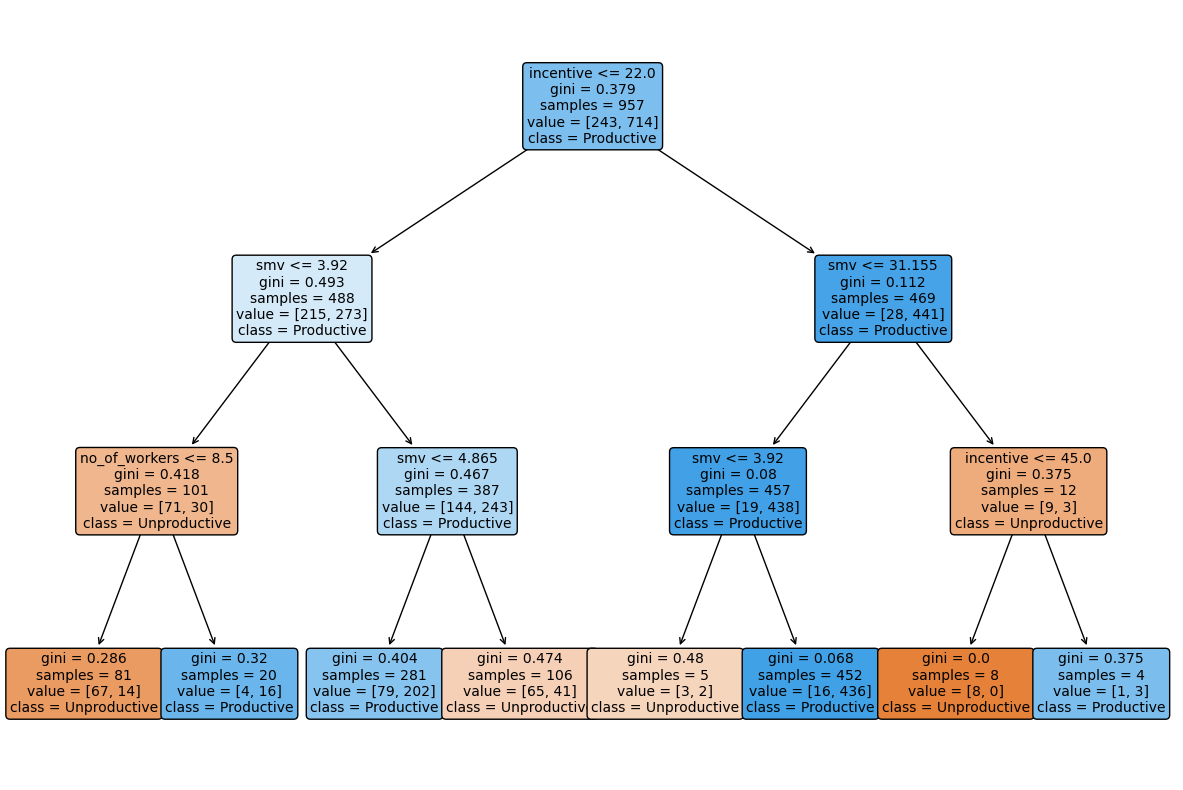

In [67]:
#setting the figure size

plt.figure(figsize = (15, 10))

#plotting the tree with specific parameters

plot_tree(tree, feature_names = X.columns, class_names = ["Unproductive", "Productive"], filled = True, rounded = True, fontsize = 10)

In [68]:
#Evaluate the model's performance using confusion matrix

from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[ 35,  24],
       [ 13, 168]], dtype=int64)

True Negative TN = 35
False Positive FP = 24
False Negative FN = 13
True Positive TP = 168

In [69]:
#Evaluate the model's performance using classification report

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

       False       0.73      0.59      0.65        59
        True       0.88      0.93      0.90       181

    accuracy                           0.85       240
   macro avg       0.80      0.76      0.78       240
weighted avg       0.84      0.85      0.84       240



Precision = TP/(TP+FP)    i.e the number of correctly predicted positive observations out of the total predicted positive observations

Recall = TP/(TP + FN)  ie the proportion of actual positive cases that were correctly identified

F1 score = 2 * (precision * recall) / (precision + recall) ie the harmonic mean of precision and recall

Accuracy = (TP + TN) / (TP + TN + FP + FN) ie (True Positives + True Negatives) / (True Positives + True Negatives + False Positives + False Negatives)

In [71]:
#Evaluate the model's performance using cross_val_score

from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree, X, y, cv = 10)

print("Cross Validation Accuracy Scores:", scores.round(2)) 

Cross Validation Accuracy Scores: [0.85 0.88 0.81 0.87 0.87 0.82 0.72 0.76 0.84 0.79]


The cross-validation is performed by splitting the data into multiple subsets, training the model on some subsets, and evaluating its performance on the remaining subsets. This process is repeated multiple times to get a more reliable estimate of the model's performance.

By using cross-validation, we can get a better understanding of how well the model is likely to perform on unseen data. The suggested scores look promising

In [72]:
#mean cross validation score

print("Mean Cross Validation Accuracy Score:", round(scores.mean(), 2))


Mean Cross Validation Accuracy Score: 0.82


In [76]:
#Evaluate the model's performance using multiple cross_validate

from sklearn.model_selection import cross_validate
multiple_cross_scores = cross_validate(
                             tree, 
                             X, y, cv = 10, 
                             scoring= ("precision", "recall", "f1") )

multiple_cross_scores["test_precision"].round(2)

array([0.86, 0.9 , 0.83, 0.85, 0.86, 0.87, 0.78, 0.85, 0.86, 0.87])

In [77]:
print("Mean Cross Validated Precision:", round(multiple_cross_scores["test_precision"].mean(), 2))

Mean Cross Validated Precision: 0.85


In [78]:
multiple_cross_scores["test_recall"].round(2)

array([0.96, 0.94, 0.94, 1.  , 0.99, 0.9 , 0.85, 0.82, 0.94, 0.84])

In [79]:
print("Mean Cross Validated F1:", round(multiple_cross_scores["test_recall"].mean(), 2))

Mean Cross Validated F1: 0.92


In [80]:
multiple_cross_scores["test_f1"].round(2)

array([0.91, 0.92, 0.88, 0.92, 0.92, 0.88, 0.82, 0.83, 0.9 , 0.86])

In [81]:
print("Mean Cross Validated F1:", round(multiple_cross_scores["test_f1"].mean(), 2))

Mean Cross Validated F1: 0.88


## Explaining the Tree

In [82]:
tree.classes_ 

array([False,  True])

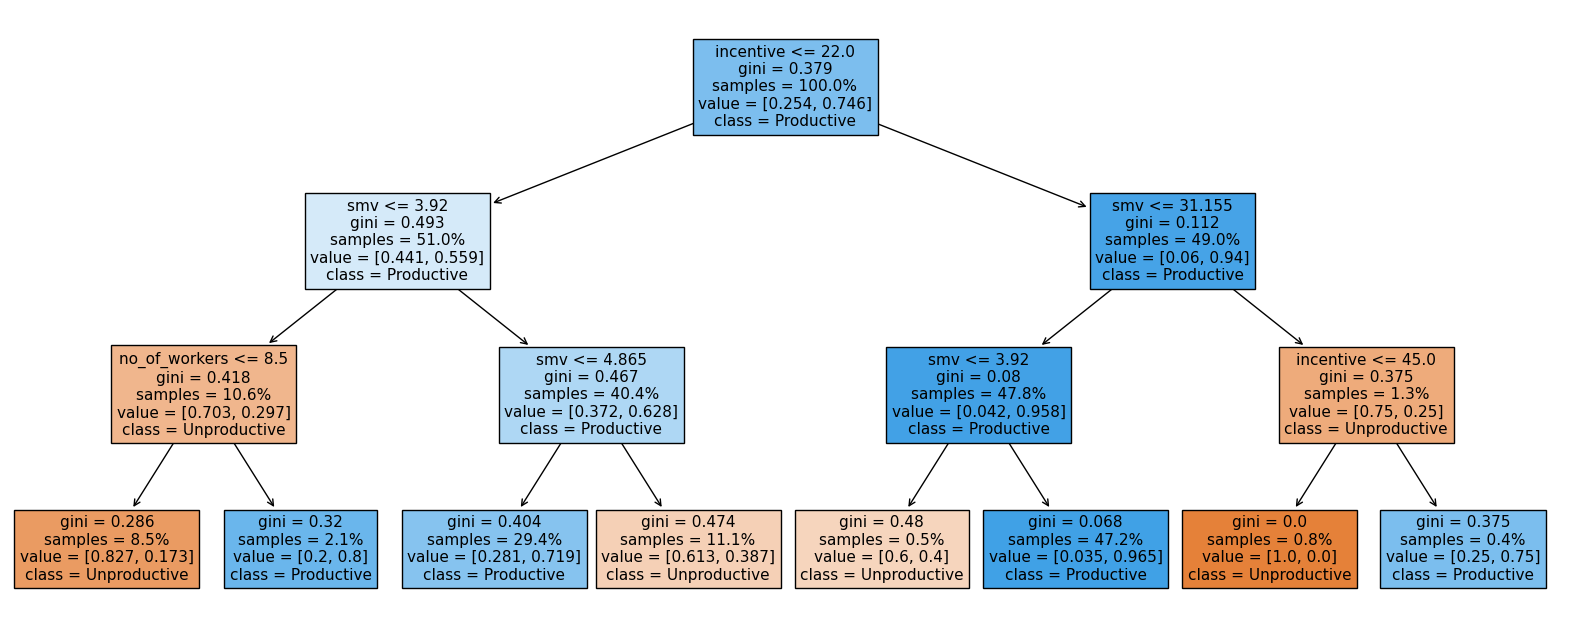

In [83]:
plt.figure(figsize = [20.0, 8.0])

_ = plot_tree(tree, 
              feature_names = X.columns, 
              class_names = ["Unproductive", "Productive"],
              filled = True, 
              rounded = False, 
              proportion = True, 
              fontsize = 11) 

- The graphic illustrates which aspects of the factory are best at predicting if a team will be productive or not. i.e. date, department, team number, etc
-  the "incentive" and the "smv" variables were the ones with the greatest influence on the final prediction; the "incentive" variable represents the amount of financial incentive offered to motivate a particular course of action. The "smv" (Standard Minute Value) variable represents the time allocated for a specific task.
- We can make predictions using the decision tree:
e.g. a fictional date where the "incentive" is 22 and "smv" is 4.44 to predict if a team will be productive or not under these conditions
Starting at the root, as 22<=22, the assertion is True, so we following the arrow to the left. 
Repeating the process:
SMV: 4.44 > 3.92 therfore False, and we follow the arrow to the right
SMV: 4.44< 4.865 therefore True, and we follow the arrow to the left, predicts the team will be Productive! 

## Using Random Forest

In [86]:
#To confirm and validate the results from our Decision Tree model, we can use a Random Forest to compare results.

from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(
                                oob_score = True,                                  
                                random_state = 24
                               )

forest.fit(X_train, y_train)

y_pred_forest = forest.predict(X_test)

print("Accuracy:", round(accuracy_score(y_test,y_pred_forest), 2))

Accuracy: 0.85


In [87]:
#check the out of bag score (oob_score) of the random forest model to see how well it generalizes to new data 


print("Out Of Bag Score:", round(forest.oob_score_, 2))




Out Of Bag Score: 0.83


As the random forest is similar to the decision tree, we can be confident about the results and know there hasnt been overfitting